该sklearn.feature_selection模块中的类可用于样本集的特征选择/降维，以提高估计量的准确性得分或提高其在超高维数据集上的性能。

链接：
https://scikit-learn.org/stable/modules/feature_selection.html

特征选择 (feature_selection)https://www.cnblogs.com/stevenlk/p/6543628.html

基于模型的特征选择详解 (Embedded & Wrapper)：https://www.cnblogs.com/stevenlk/p/6543646.html

# 删除低方差的特征

**VarianceThreshold**是特征选择的简单基准方法。它将删除方差未达到某个阈值的所有特征。默认情况下，它将删除所有零方差特征，即在所有样本中具有相同值的特征。

这种特征选择算法只考虑特征(x) ，而不考虑期望的输出(y) ，因此可以用于___非监督式学习___

官方说明：https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold.get_support

例如，假设我们有一个具有布尔特性的数据集，我们希望删除超过80% 的样本中的所有一或零(开或关)的特性。 布尔特征是贝努利随机变量，这些变量的方差由

$Var(X)=p(1-p)$

所以我们可以选择使用阈值:8 * (1-. 8) 

In [66]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

In [67]:
#sel.fit(X)+sel.transform(X)=sel.fit_transform(X)
sel.fit(X)#从 x 中学习经验方差
print(sel.transform(X))# 减少 x 到选定的特性

[[0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]]


In [68]:
X_trans = sel.fit_transform(X)#学习数据，然后转换它
print(X_trans)
print('*'*60)
print(sel.inverse_transform(X_trans))#逆变换
print('*'*60)
print(sel.get_params())#得到此估计量的参数
print('*'*60)
print(sel.get_support())#获取所选特性的整数索引

[[0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]]
************************************************************
[[0 0 1]
 [0 1 0]
 [0 0 0]
 [0 1 1]
 [0 1 0]
 [0 1 1]]
************************************************************
{'threshold': 0.15999999999999998}
************************************************************
[False  True  True]


正如预期的那样，**VarianceThreshold** 删除了第一列，其中包含零的概率为 p=5 / 6 > 0.8

方差在一定程度上表示数据包含的信息量（参看下面的链接说明），一个特征的方差越小，则说明该特征的波动越小，其自身是相对稳定的，这样的特征本身是确定的，不随着其他变量发生太大变化，因此这样的特征也就没有了参与后期计算的意义。

___如何理解“方差越大信息量就越多？___链接：https://blog.csdn.net/weixin_42631192/article/details/88884967

In [90]:
from sklearn.feature_selection import  VarianceThreshold

#数据预处理过滤式特征选取VarianceThreshold模型
def test_VarianceThreshold():
    X=[[100,1,2,3],
       [100,4,5,6],
       [100,7,8,9],
       [101,11,12,13]]
    selector=VarianceThreshold(1)#删除方差未达到1的所有特征
    selector.fit(X)
    print("Variances is %s"%selector.variances_)#四个特征的方差
    print("After transform is %s"%selector.transform(X))#删除方差未达到1的特征，即第0列的特征
    print("The surport is %s"%selector.get_support(True))
    print("After reverse transform is %s"%selector.inverse_transform(selector.transform(X)))
    
#调用test_VarianceThreshold()
test_VarianceThreshold()

Variances is [ 0.1875 13.6875 13.6875 13.6875]
After transform is [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [11 12 13]]
The surport is [1 2 3]
After reverse transform is [[ 0  1  2  3]
 [ 0  4  5  6]
 [ 0  7  8  9]
 [ 0 11 12 13]]


# 单变量特征选择

单变量特征选择通过基于单变量统计检验选择最佳特征来工作。可以将其视为估算器的预处理步骤。Scikit-learn将要素选择例程公开为实现该transform方法的对象：

## **SelectKBest** 除了 k 最高得分的功能外，SelectKBest 删除了所有特征
官网说明：https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

参数说明：class sklearn.feature_selection.SelectKBest(__score_func__=<function f_classif>, *, __k__=10)
    
___score_func__: 可调用函数。
函数接受两个数组 x 和 y，并返回一对数组(scores，pvalue)或带 scores 的单个数组。 默认值是 f classif (参见下面的“另见”)。 默认函数只适用于分类任务。
    
官方提供的可用函数：
- 分类： f_classif（分类任务中标签 / 特征之间的方差分析 f 值），mutual_info_classif（离散目标的互信息），chi2（用于分类任务的非负特性的卡方统计），
    
- 回归：f_regression（用于回归任务的标签 / 特征之间的 f 值），mutual_info_regression（连续目标的互信息），
    
    SelectPercentile（根据最高分的百分比选择特征）,SelectFpr（根据假阳性率测试选择特征），SelectFdr（根据估计的错误发现率选择特征），SelectFwe（基于分类错误率选择特性），GenericUnivariateSelect（可配置模式的单变量特征选择器）
    
__k__: 整数int或者'all'，默认为10。要选择的顶部特性的数量。“全部”选项绕过选择，用于参数搜索。

In [37]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile,mutual_info_classif
X, y = load_digits(return_X_y=True)
print(X.shape)
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
print(X_new.shape)

(1797, 64)
(1797, 20)


SelectKBest就是选择统计值在前k个的特征保留下来，即保留标签相关性大前k个的特征

简聊卡方统计:https://www.jianshu.com/p/86687ceade71

卡方检验是一种用途非常广泛的假设检验方法，在统计推断中使用非常多，可以检测多个分类变量之间的相关性是否显著。

卡方检验就是统计样本的实际观测值和理论推断值之间的偏离程度，如果chi-square值越大，二者偏差程度越大；反之，二者偏差越小。若chi-square为0，表明理论和实际值完全符合，完全相关。



In [87]:
#利用chi2卡方分布计算每一个特征的卡方统计量和每一个特征的pval值
from sklearn.feature_selection import SelectKBest,chi2
X=[[1,2,3,4,5],
      [5,4,3,2,1],
      [3,3,3,3,3,],
      [1,1,1,1,1]]
y=[0,1,0,1]
scores_,pvalues_ = chi2(X,y)
print(scores_)#每一个特征的卡方统计量
print(pvalues_)#每一个特征的pval值

[0.4 0.  0.4 1.6 3.6]
[0.52708926 1.         0.52708926 0.20590321 0.05777957]


In [88]:
from sklearn.feature_selection import SelectKBest,chi2

#数据预处理过滤式特征选取SelectKBest模型
def test_SelectKBest():
    X=[[1,2,3,4,5],
          [5,4,3,2,1],
          [3,3,3,3,3,],
          [1,1,1,1,1]]
    y=[0,1,0,1]
    print("before transform:",X)
    selector=SelectKBest(score_func=chi2,k=3)
    selector.fit(X,y)
    print("scores_:",selector.scores_))#每一个特征的卡方统计量
    print("pvalues_:",selector.pvalues_)#每一个特征的pval值
    print("selected index:",selector.get_support(True))#选择卡方值前三的特征
    print("after transform:",selector.transform(X))
    
#调用test_SelectKBest()
test_SelectKBest()

before transform: [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [3, 3, 3, 3, 3], [1, 1, 1, 1, 1]]
scores_: [0.4 0.  0.4 1.6 3.6]
pvalues_: [0.52708926 1.         0.52708926 0.20590321 0.05777957]
selected index: [2 3 4]
after transform: [[3 4 5]
 [3 2 1]
 [3 3 3]
 [1 1 1]]


## **SelectPercentile** 删除除用户指定的最高得分百分比以外的所有特征

官网说明：https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile

参数说明：class sklearn.feature_selection.SelectPercentile(score_func=<function f_classif>, *, percentile=10)
    
___score_func__: 可调用函数。
函数接受两个数组 x 和 y，并返回一对数组(scores，pvalue)或带 scores 的单个数组。 默认值是 f classif (参见下面的“另见”)。 默认函数只适用于分类任务。
    
官方提供的可用函数：
- 分类： f_classif（分类任务中标签 / 特征之间的方差分析 f 值），mutual_info_classif（离散目标的互信息），chi2（用于分类任务的非负特性的卡方统计），
    
- 回归：f_regression（用于回归任务的标签 / 特征之间的 f 值），mutual_info_regression（连续目标的互信息）
    
    SelectKBest（根据 k 最高分选择特性）,SelectFpr（根据假阳性率测试选择特征），SelectFdr（根据估计的错误发现率选择特征），SelectFwe（基于分类错误率选择特性），GenericUnivariateSelect（可配置模式的单变量特征选择器）
    
__percentile__: 百分位数，默认为10。要保留的特性百分比。

In [40]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
print(X.shape)
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
print(X_new.shape)

(1797, 64)
(1797, 7)


In [92]:
from sklearn.feature_selection import SelectPercentile,f_classif

#数据预处理过滤式特征选取SelectPercentile模型
def test_SelectKBest():
    X=[[1,2,3,4,5],
          [5,4,3,2,1],
          [3,3,3,3,3,],
          [1,1,1,1,1]]
    y=[0,1,0,1]
    print("before transform:",X)
    selector=SelectPercentile(score_func=f_classif,percentile=10)
    selector.fit(X,y)
    print("scores_:",selector.scores_)
    print("pvalues_:",selector.pvalues_)
    print("selected index:",selector.get_support(True))
    print("after transform:",selector.transform(X))
    
#调用test_SelectKBest()
test_SelectKBest()

before transform: [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [3, 3, 3, 3, 3], [1, 1, 1, 1, 1]]
scores_: [0.2 0.  1.  8.  9. ]
pvalues_: [0.69848865 1.         0.42264974 0.10557281 0.09546597]
selected index: [4]
after transform: [[5]
 [1]
 [3]
 [1]]


## 对每个特征使用通用的单变量统计检验：false positive rate **SelectFpr**, false discovery rate **SelectFdr**, or family wise error **SelectFwe**
对每个特征使用常见的单变量统计检验

### SelectFpr

官网说明：https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFpr.html#sklearn.feature_selection.SelectFpr

参数说明：class sklearn.feature_selection.SelectFpr(score_func=<function f_classif>, *, alpha=0.05)

___score_func__: 可调用函数。
函数接受两个数组 x 和 y，并返回一对数组(scores，pvalue)或带 scores 的单个数组。 默认值是 f classif (参见下面的“另见”)。 默认函数只适用于分类任务。
    
官方提供的可用函数：
- 分类： f_classif（分类任务中标签 / 特征之间的方差分析 f 值），mutual_info_classif（离散目标的互信息），chi2（用于分类任务的非负特性的卡方统计），
    
- 回归：f_regression（用于回归任务的标签 / 特征之间的 f 值），mutual_info_regression（连续目标的互信息），

    
__alpha__: 浮点型，默认为0.05。要保留的特性的最高 p 值。

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFpr, chi2
X, y = load_breast_cancer(return_X_y=True)
print(X.shape)
X_new = SelectFpr(chi2, alpha=0.01).fit_transform(X, y)
print(X_new.shape)


(569, 30)
(569, 16)


### SelectFdr

官网说明：https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFdr.html#sklearn.feature_selection.SelectFdr

参数说明：class sklearn.feature_selection.SelectFdr(score_func=<function f_classif>, *, alpha=0.05)

___score_func__: 可调用函数。
函数接受两个数组 x 和 y，并返回一对数组(scores，pvalue)或带 scores 的单个数组。 默认值是 f classif (参见下面的“另见”)。 默认函数只适用于分类任务。
    
官方提供的可用函数：
- 分类： f_classif（分类任务中标签 / 特征之间的方差分析 f 值），mutual_info_classif（离散目标的互信息），chi2（用于分类任务的非负特性的卡方统计），
    
- 回归：f_regression（用于回归任务的标签 / 特征之间的 f 值），mutual_info_regression（连续目标的互信息），

    
__alpha__: 浮点型，默认为0.05。要保留的特性的最高 p 值。

In [44]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFdr, chi2
X, y = load_breast_cancer(return_X_y=True)
print(X.shape)
X_new = SelectFdr(chi2, alpha=0.01).fit_transform(X, y)
print(X_new.shape)

(569, 30)
(569, 16)


### SelectFwe

官网说明：https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFwe.html#sklearn.feature_selection.SelectFwe

参数说明：class sklearn.feature_selection.SelectFwe(score_func=<function f_classif>, *, alpha=0.05)

___score_func__: 可调用函数。
函数接受两个数组 x 和 y，并返回一对数组(scores，pvalue)或带 scores 的单个数组。 默认值是 f classif (参见下面的“另见”)。 默认函数只适用于分类任务。
    
官方提供的可用函数：
- 分类： f_classif（分类任务中标签 / 特征之间的方差分析 f 值）,chi2（用于分类任务的非负特性的卡方统计），
    
- 回归：f_regression（用于回归任务的标签 / 特征之间的 f 值）

    
__alpha__: 浮点型，默认为0.05。要保留的特性的最高 p 值。

In [64]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFwe, chi2
X, y = load_breast_cancer(return_X_y=True)
print(X.shape)

X_new = SelectFwe(chi2, alpha=0.01).fit_transform(X, y)
print(X_new.shape)


(569, 30)
(569, 15)


## **GenericUnivariateSelect**允许使用可配置策略执行单变量特征选择。 这允许选择最佳的单变量选择策略与超参数搜索估计。

官网说明：https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.GenericUnivariateSelect.html#sklearn.feature_selection.GenericUnivariateSelect

参数说明：class sklearn.feature_selection.GenericUnivariateSelect(score_func=<function f_classif>, *, mode='percentile', param=1e-05)

___score_func__: 可调用函数。
函数接受两个数组 x 和 y，并返回一对数组(scores，pvalue)。 对于“百分位”或“最佳”模式，它可以返回单个数组得分。
    
__mode__: {‘percentile’, ‘k_best’, ‘fpr’, ‘fdr’, ‘fwe’}。
特征选择模式
    
__param__: 浮点数或整型数取决于特征选择模式。

In [52]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import GenericUnivariateSelect, chi2
X, y = load_breast_cancer(return_X_y=True)
print(X.shape)
transformer = GenericUnivariateSelect(chi2, mode='k_best', param=20)
X_new = transformer.fit_transform(X, y)
print(X_new.shape)

(569, 30)
(569, 20)


**这个函数相当于第2部分单变量特征选择的函数集合，在这一个里可以实现上述5种单变量特征选择的方法，接下来就让我们测试一下结果是不是一致**

In [54]:
#对比SelectKBest函数，返现结果一致
from sklearn.datasets import load_digits
from sklearn.feature_selection import GenericUnivariateSelect, chi2
X, y = load_digits(return_X_y=True)
print(X.shape)
transformer = GenericUnivariateSelect(chi2, mode='k_best', param=20)
X_new = transformer.fit_transform(X, y)
print(X_new.shape)

(1797, 64)
(1797, 20)


In [55]:
#对比SelectPercentile函数，返现结果一致
from sklearn.datasets import load_digits
from sklearn.feature_selection import GenericUnivariateSelect, chi2
X, y = load_digits(return_X_y=True)
print(X.shape)
transformer = GenericUnivariateSelect(chi2, mode='percentile', param=10)
X_new = transformer.fit_transform(X, y)
print(X_new.shape)

(1797, 64)
(1797, 7)


In [57]:
#对比SelectFpr函数，返现结果一致
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import GenericUnivariateSelect, chi2
X, y = load_breast_cancer(return_X_y=True)
print(X.shape)
transformer = GenericUnivariateSelect(chi2, mode='fpr', param=0.01)
X_new = transformer.fit_transform(X, y)
print(X_new.shape)

(569, 30)
(569, 16)


In [58]:
#对比SelectFdr函数，返现结果一致
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import GenericUnivariateSelect, chi2
X, y = load_breast_cancer(return_X_y=True)
print(X.shape)
transformer = GenericUnivariateSelect(chi2, mode='fdr', param=0.01)
X_new = transformer.fit_transform(X, y)
print(X_new.shape)

(569, 30)
(569, 16)


In [61]:
#对比SelectFwe函数，返现结果一致
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import GenericUnivariateSelect, chi2
X, y = load_breast_cancer(return_X_y=True)
print(X.shape)
transformer = GenericUnivariateSelect(chi2, mode='fwe', param=0.01)
X_new = transformer.fit_transform(X, y)
print(X_new.shape)

(569, 30)
(569, 15)


这些对象以一个计分函数作为输入，该函数返回单变量得分和 p 值(或者只返回 SelectKBest 和 SelectPercentile 的得分) :

- 分类： f_classif（分类任务中标签 / 特征之间的方差分析 f 值），mutual_info_classif（离散目标的互信息），chi2（用于分类任务的非负特性的卡方统计），
- 回归：f_regression（用于回归任务的标签 / 特征之间的 f 值），mutual_info_regression（连续目标的互信息），

Sklearn中的f_classif和f_regression:https://blog.csdn.net/jetFlow/article/details/78884619

基于 f 检验的方法估计了两个随机变量之间的线性相关度。 另一方面，互信息方法可以捕捉任何类型的统计相关性，但是作为非参数方法，它们需要更多的样本进行精确估计。

**如果您使用稀疏数据（即数据表示为稀疏矩阵） chi2，mutual_info_regression，mutual_info_classif 会处理数据而不会使其变得密集。**

**Warning警告** 
注意不要在分类问题上使用回归评分函数，否则会得到无用的结果。

# 递归特征消除

给定一个将权重分配给特征（例如线性模型的系数）的外部估计器，

递归特征消除（RFE）是通过递归考虑越来越少的特征集来选择特征。首先，对估计器进行初始特征集训练，并通过coef_属性或属性获得每个特征的重要性feature_importances_。然后，从当前的一组特征中删除最不重要的特征，然后对该过程进行递归重复，直到最终达到所需的特征数量。

RFECV 在交叉验证循环中执行RFE，以找到最佳数量的特征。

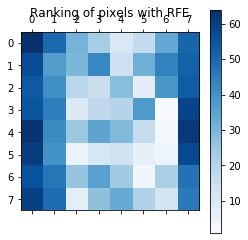

In [94]:
#使用RFE
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

Optimal number of features : 3


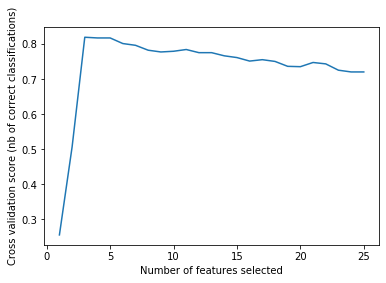

In [95]:
#使用RFECV 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# 使用SelectFromModel特征选择
SelectFromModel是一个元变压器，可与拟合后具有coef_或feature_importances_属性的任何估计量一起使用。如果相应的coef_或feature_importances_值低于提供的 threshold参数，则认为这些功能不重要并已删除 。除了通过数字指定阈值之外，还内置了使用字符串参数查找阈值的试探法。可用的试探法是“均值”，“中位数”和浮点数的倍数，例如“ 0.1 *均值”。与threshold标准结合使用时，可以使用 max_features参数设置要选择的要素数量的限制。



## 基于L1-特征选择
受到L1范数惩罚的线性模型的解决方案稀疏：许多估计系数为零。当目标是减少要与另一个分类器一起使用的数据的维数时，可以将它们与feature_selection.SelectFromModel 选择非零系数一起使用。特别地，用于此目的的稀疏估计量是linear_model.Lasso用于回归，和linear_model.LogisticRegression以及svm.LinearSVC 用于分类的：

In [26]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
print(X.shape)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print(X_new.shape)

(150, 4)
(150, 3)


## 基于树的特征选择
基于树的估计器（请参阅sklearn.tree模块和模块中的树林sklearn.ensemble）可用于计算基于杂质的特征重要性，而反过来又可用于丢弃不相关的特征（与sklearn.feature_selection.SelectFromModel meta-transformer 结合使用）：

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
print(X.shape)
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
print(clf.feature_importances_ ) 
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape)               

(150, 4)
[0.06409045 0.06899865 0.44150118 0.42540972]
(150, 2)


# 功能选择作为管道的一部分
在进行实际学习之前，通常将特征选择用作预处理步骤。推荐在scikit-learn中执行此操作的方法是使用sklearn.pipeline.Pipeline：

在此代码段中，我们sklearn.svm.LinearSVC 结合使用sklearn.feature_selection.SelectFromModel 来评估功能的重要性并选择最相关的功能。然后，sklearn.ensemble.RandomForestClassifier对转换后的输出（即仅使用相关特征）进行训练。您可以使用其他功能选择方法以及分类器执行类似的操作，这些分类器提供了一种评估功能的重要性的方法。有关sklearn.pipeline.Pipeline更多详细信息，请参见示例。

In [33]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])
pipe.score(X_test, y_test)

0.88